In [1]:
# @title Librerías
# Importamos todos los componentes de la librería Brian2, que se usa para crear y simular redes neuronales.
from brian2 import *

# Importamos numpy como np desde la librería Brian2.
import brian2.numpy_ as np

# Importamos la librería matplotlib para crear gráficos y visualizaciones.
import matplotlib.pyplot as plt

# Importamos el clasificador RandomForest y las funciones de evaluación de sklearn.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Importamos model_selection para poder particionar nuestros datos
from sklearn.model_selection import train_test_split

#
import networkx as nx

In [ ]:
# @title Datasets
# Importamos el conjunto de datos MNIST desde Keras, que contiene imágenes de dígitos escritos a mano.
from tensorflow.keras.datasets import mnist, fashion_mnist

In [1]:
# @title MNIST
# Cargamos los datos del conjunto de datos MNIST.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Filtramos las imágenes de entrenamiento para incluir solo las clases 0, 1 y 8.
X_train = X_train[(y_train == 1) | (y_train == 0) | (y_train == 8)]
y_train = y_train[(y_train == 1) | (y_train == 0) | (y_train == 8)]

# Filtramos las imágenes de prueba para incluir solo las clases 0, 1 y 8.
X_test = X_test[(y_test == 1) | (y_test == 0) | (y_test == 8)]
y_test = y_test[(y_test == 1) | (y_test == 0) | (y_test == 8)]

# Normalizamos las intensidades de los píxeles de las imágenes de entrenamiento,
# dividiendo cada valor de píxel por 4 para convertirlos a una escala de Hz.
# Por ejemplo, un valor máximo de 255 se convierte en ~63Hz.
X_train = X_train / 4

# Normalizamos las intensidades de los píxeles de las imágenes de prueba de la misma manera.
X_test = X_test / 4

# Muestramos las dimensiones de los conjuntos de datos de entrenamiento y prueba.
X_train.shape, X_test.shape

NameError: name 'mnist' is not defined

In [2]:
# @title Muestras MNIST
# Crea una nueva figura para los gráficos, con un tamaño de 16x8 pulgadas.
plt.figure(figsize=(16,8))
plt.suptitle('Muestra de imágenes de MNIST (Clases 0, 1, 8)', fontsize=16)

# Bucle para mostrar las primeras 32 imágenes del conjunto de entrenamiento.
for img in range(32):
    # Crea un subgráfico en una cuadrícula de 4 filas y 8 columnas.
    plt.subplot(4, 8, 1 + img)

    # Establece el título del subgráfico como la etiqueta de la imagen correspondiente.
    plt.title(y_train[img])

    # Muestra la imagen correspondiente del conjunto de entrenamiento.
    plt.imshow(X_train[img])

    # Oculta los ejes para que no se muestren las marcas alrededor de las imágenes.
    plt.axis('off')

NameError: name 'plt' is not defined

In [39]:
# @title Fashion-MNIST
# Cargamos los datos del conjunto de datos Fasion-MNIST.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizamos las intensidades de los píxeles de las imágenes de entrenamiento,
# dividiendo cada valor de píxel por 4 para convertirlos a una escala de Hz.
# Por ejemplo, un valor máximo de 255 se convierte en ~63Hz.
X_train = X_train / 4

# Normalizamos las intensidades de los píxeles de las imágenes de prueba de la misma manera.
X_test = X_test / 4

# Muestramos las dimensiones de los conjuntos de datos de entrenamiento y prueba.
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
# @title Fashion-MNIST (entrenamiento, validación y prueba)
# Cargamos los datos del conjunto de datos Fashion-MNIST.
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalizamos las intensidades de los píxeles de las imágenes,
# dividiendo cada valor de píxel por 4 para convertirlos a una escala de Hz.
# Por ejemplo, un valor máximo de 255 se convierte en ~63.75 Hz.
X_train_full = X_train_full / 4
X_test = X_test / 4

# Dividimos el conjunto de entrenamiento en entrenamiento y validación
# Tomaremos, por ejemplo, el 80% para entrenamiento y el 20% para validación.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# Mostramos las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento: (48000, 28, 28)
Tamaño del conjunto de validación: (12000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


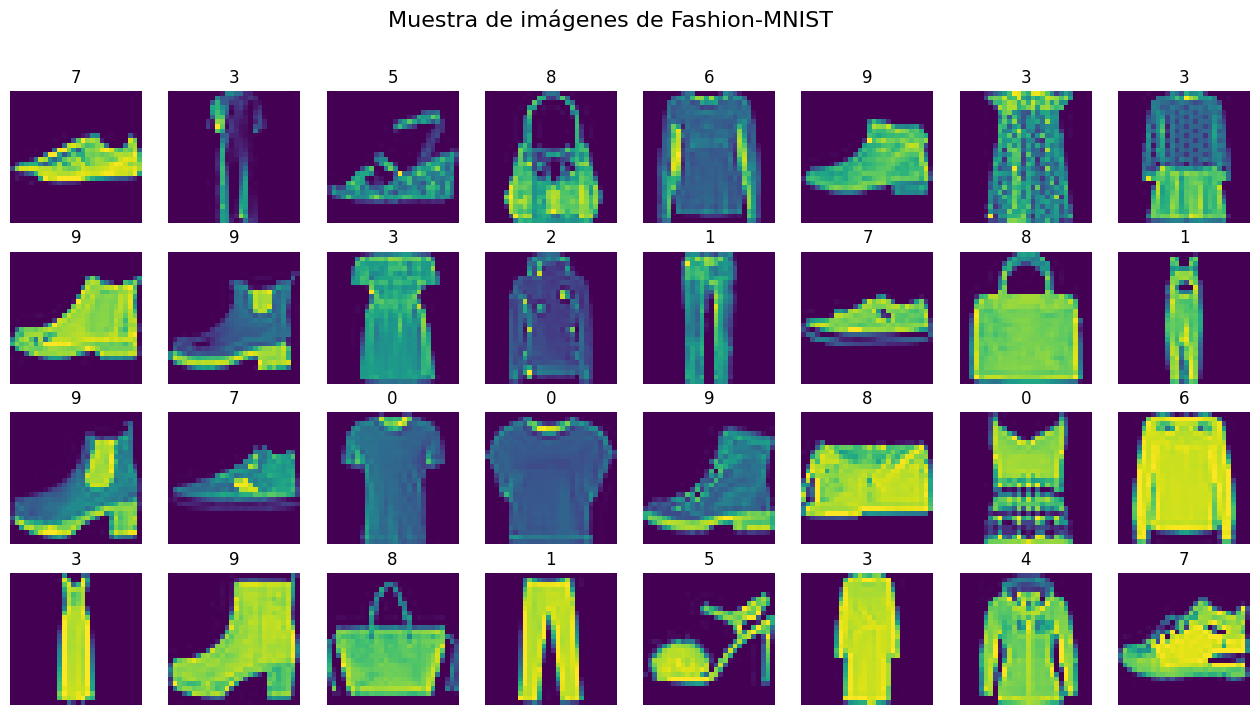

In [6]:
# Crea una nueva figura para los gráficos, con un tamaño de 16x8 pulgadas.
plt.figure(figsize=(16,8))
plt.suptitle('Muestra de imágenes de Fashion-MNIST', fontsize=16)

# Bucle para mostrar las primeras 32 imágenes del conjunto de entrenamiento.
for img in range(32):
    # Crea un subgráfico en una cuadrícula de 4 filas y 8 columnas.
    plt.subplot(4, 8, 1 + img)

    # Establece el título del subgráfico como la etiqueta de la imagen correspondiente.
    plt.title(y_train[img])

    # Muestra la imagen correspondiente del conjunto de entrenamiento.
    plt.imshow(X_train[img])

    # Oculta los ejes para que no se muestren las marcas alrededor de las imágenes.
    plt.axis('off')

## ¿Qué es una Red Neuronal Pulsante (SNN)?
Una *Spiking Neural Network* (SNN, por sus siglas en inglés) es un tipo de red neuronal que intenta imitar el comportamiento de las neuronas biológicas. En lugar de procesar información en pasos discretos como las redes neuronales tradicionales, las SNN procesan información en tiempo real y usan "picos" o impulsos eléctricos para comunicarse entre neuronas.

### ¿Qué son las neuronas excitatorias e inhibitorias?
* **Neuronas excitatorias**: Estas neuronas, cuando se activan, envían señales que aumentan la probabilidad de que otras neuronas también se activen.
* **Neuronas inhibitorias**: Estas neuronas, cuando se activan, envían señales que disminuyen la probabilidad de que otras neuronas se activen.

### ¿Qué son los potenciales de membrana?
Cada neurona tiene un potencial de membrana, que es como su nivel de energía. Cuando este nivel alcanza un cierto umbral, la neurona dispara (envía una espiga) y su nivel de energía se reinicia.

* `n_input`: Este es el número de neuronas en la capa de entrada. Corresponde a los píxeles de una imagen de 28x28, lo que hace un total de 784 neuronas.
* `n_e` y `n_i`: Estas son las neuronas excitatorias e inhibitorias, respectivamente. En este caso, tenemos 100 de cada tipo.

In [7]:
# Define el número de neuronas en la capa de entrada, que corresponde a los píxeles de una imagen de 28x28.
n_input = 28 * 28  # Capa de entrada

# Define el número de neuronas excitatorias.
n_e = 100  # e - excitatory

# Define el número de neuronas inhibitorias, igual al número de neuronas excitatorias.
n_i = n_e  # i - inhibitory

### Potenciales de membrana

* `v_rest`: Este es el nivel de energía en el que la neurona se encuentra normalmente (potencial de reposo).
* `v_reset`: Este es el nivel de energía al que la neurona vuelve después de disparar (potencial de reinicio).
* `v_thresh`: Este es el nivel de energía que la neurona debe alcanzar para disparar (umbral de disparo).

In [8]:
# Establece los parámetros del potencial de membrana para las neuronas excitatorias.
v_rest_e = -60. * mV  # Potencial de reposo
v_reset_e = -65. * mV  # Potencial de reinicio después de un spike
v_thresh_e = -52. * mV  # Umbral para generar un spike

# Establece los parámetros del potencial de membrana para las neuronas inhibitorias.
v_rest_i = -60. * mV  # Potencial de reposo
v_reset_i = -45. * mV  # Potencial de reinicio después de un spike
v_thresh_i = -40. * mV  # Umbral para generar un spike

### Aprendizaje dependiente del tiempo del disparo (STDP):
El STDP es un proceso que ajusta la fuerza de las conexiones entre neuronas (sinapsis) basado en el tiempo relativo de los disparos de las neuronas.

* `taupre` y `taupost`: Estas son constantes de tiempo que determinan cuánto tiempo duran los efectos del aprendizaje en la neurona.
gmax: Este es el valor máximo que puede alcanzar la fuerza de la conexión (conductancia sináptica).
* `dApre` y `dApost`: Estos son los cambios en la fuerza de la conexión debidos a los disparos de las neuronas. dApre se usa para ajustar la conexión cuando una neurona pre-sináptica dispara, y dApost se usa cuando una neurona post-sináptica dispara.

In [9]:
# Establece la constante de tiempo para la dinámica de aprendizaje STDP (Spike-Timing-Dependent Plasticity).
taupre = 20 * ms  # Constante de tiempo para los eventos pre-sinápticos
taupost = taupre  # Constante de tiempo para los eventos post-sinápticos, igual a taupre

# Establece el máximo valor de la conductancia sináptica.
gmax = 0.05  # Conductancia sináptica máxima

# Define las tasas de cambio para el aprendizaje STDP.
dApre = 0.01  # Cambio en la potenciación a largo plazo (LTP)
dApost = -dApre * taupre / taupost * 1.05  # Cambio en la depresión a largo plazo (LTD)
dApost *= gmax  # Ajusta el cambio en LTD por la conductancia máxima
dApre *= gmax  # Ajusta el cambio en LTP por la conductancia máxima

### Ecuaciones para las trazas pre-sinápticas y post-sinápticas:
Estas ecuaciones describen cómo las trazas (memorias de disparos recientes) cambian con el tiempo. Aquí, dApre y dApost disminuyen exponencialmente con el tiempo.

### Acciones durante los eventos pre-sinápticos y post-sinápticos:
* **Evento pre-sináptico**: Cuando una neurona pre-sináptica dispara, aumenta la conductancia excitatoria (ge), actualiza la traza pre-sináptica (Apre), y ajusta la fuerza de la sinapsis (w).
* **Evento post-sináptico**: Cuando una neurona post-sináptica dispara, actualiza la traza post-sináptica (Apost) y ajusta la fuerza de la sinapsis (w).

In [10]:
# Define las ecuaciones para las trazas pre-sinápticas y post-sinápticas, así como la tasa de aprendizaje (lr).
stdp = '''w : 1  # La variable sináptica w representa la fuerza de la sinapsis.
        lr : 1 (shared)  # lr es la tasa de aprendizaje compartida entre todas las sinapsis.
        dApre/dt = -Apre / taupre : 1 (event-driven)  # Ecuación diferencial para la traza pre-sináptica (Apre).
        dApost/dt = -Apost / taupost : 1 (event-driven)'''  # Ecuación diferencial para la traza post-sináptica (Apost).

# Define las acciones que se realizan en un evento pre-sináptico.
pre = '''ge += w  # Incrementa la conductancia excitatoria (ge) en función de la fuerza sináptica (w).
        Apre += dApre  # Actualiza la traza pre-sináptica (Apre) sumando el cambio correspondiente.
        w = clip(w + lr * Apost, 0, gmax)'''  # Actualiza la fuerza sináptica (w) con la contribución post-sináptica (Apost) y asegura que esté en el rango [0, gmax].

# Define las acciones que se realizan en un evento post-sináptico.
post = '''Apost += dApost  # Actualiza la traza post-sináptica (Apost) sumando el cambio correspondiente.
        w = clip(w + lr * Apre, 0, gmax)'''  # Actualiza la fuerza sináptica (w) con la contribución pre-sináptica (Apre) y asegura que esté en el rango [0, gmax].

## Arquitectura del modelo SNN
1. **Generadores de Poisson**: convierten las imágenes de entrada en tasas de disparo. Básicamente, toman la información de las imágenes y la transforman en señales que la red puede procesar.
2. **Grupo de neuronas excitatorias**: Define un grupo de neuronas excitatorias que se activan cuando alcanzan un cierto nivel de energía. Estas neuronas ayudan a propagar señales a través de la red.
3. **Grupo de neuronas inhibitorias**: Define un grupo de neuronas inhibitorias que disminuyen la probabilidad de activación de otras neuronas. Ayudan a mantener el equilibrio en la red.
4. **Monitores (modo debug)**: Si el modo de depuración (debug) está activado, se agregan monitores para rastrear la actividad de las neuronas excitatorias.
5. **Sinapsis (conexiones entre neuronas)**: Conecta los generadores de Poisson a las neuronas excitatorias con sinapsis plásticas que pueden aprender y cambiar con el tiempo.
6. **Sinapsis excitatorias a inhibitorias**: Conecta cada neurona excitatoria a una neurona inhibitoria, asegurando que las neuronas inhibitorias se activen correctamente.
7. **Sinapsis inhibitorias a excitatorias**: Conecta cada neurona inhibitoria a todas las neuronas excitatorias excepto una, para mantener el equilibrio en la red.
8. **Inicialización de la red**: Crea una red con todos los componentes definidos y la inicializa.

In [11]:
# Define una clase llamada Model para construir y entrenar la red neuronal SNN.
class Model():

    # Método constructor de la clase Model.
    def __init__(self, debug=False):
        app = {}  # Diccionario para almacenar los componentes de la red.

        # Generadores de Poisson para codificar las imágenes de entrada como tasas de disparo.
        app['PG'] = PoissonGroup(n_input, rates=np.zeros(n_input)*Hz, name='PG')

        # Definición del grupo de neuronas excitatorias.
        neuron_e = '''
                    dv/dt = (ge*(0*mV-v) + gi*(-100*mV-v) + (v_rest_e-v)) / (100*ms) : volt
                    dge/dt = -ge / (5*ms) : 1
                    dgi/dt = -gi / (10*ms) : 1
                    '''
        app['EG'] = NeuronGroup(n_e, neuron_e, threshold='v>v_thresh_e',
                                refractory=5*ms, reset='v=v_reset_e',
                                method='euler', name='EG')
        # Inicializamos el potencial de membrana de las neuronas excitatorias.
        app['EG'].v = v_rest_e - 20.*mV

        # Si el modo debug está activado, agregamos monitores para el grupo excitatorio
        if debug:
            app['ESP'] = SpikeMonitor(app['EG'], name='ESP')
            app['ESM'] = StateMonitor(app['EG'], ['v'], record=True, name='ESM')
            app['ERM'] = PopulationRateMonitor(app['EG'], name='ERM')

        # Definición del grupo de neuronas inhibitorias.
        neuron_i = '''
                  dv/dt = (ge*(0*mV-v) + (v_rest_i-v)) / (10*ms) : volt
                  dge/dt = -ge / (5*ms) : 1
                  '''
        app['IG'] = NeuronGroup(n_i, neuron_i, threshold='v>v_thresh_i',
                                refractory=2*ms, reset='v=v_reset_i',
                                method='euler', name='IG')
        # Inicializamos el potencial de membrana de las neuronas inhibitorias.
        app['IG'].v = v_rest_i - 20.*mV

        # Si el modo debug está activado, agregamos monitores para el grupo inhibitorio.
        if debug:
            app['ISP'] = SpikeMonitor(app['IG'], name='ISP')
            app['ISM'] = StateMonitor(app['IG'], ['v'], record=True, name='ISM')
            app['IRM'] = PopulationRateMonitor(app['IG'], name='IRM')

        # Generadores de Poisson conectados a todas las neuronas excitatorias con conexiones plásticas.
        app['S1'] = Synapses(app['PG'], app['EG'], stdp, on_pre=pre,
                             on_post=post, method='euler', name='S1')
        app['S1'].connect()  # Conecta todos los generadores de Poisson a las neuronas excitatorias.
        app['S1'].w = 'rand()*gmax'  # Inicializa los pesos sinápticos de forma aleatoria.
        app['S1'].lr = 1  # Habilita el STDP (plasticidad dependiente del tiempo del disparo).

        # Si el modo debug está activado, agregamos un monitor de estado para algunas sinapsis.
        if debug:
            app['S1M'] = StateMonitor(app['S1'], ['w', 'Apre', 'Apost'],
                                      record=app['S1'][380,:4], name='S1M')

        # Conexiones de las neuronas excitatorias a las inhibitorias (uno a uno).
        app['S2'] = Synapses(app['EG'], app['IG'], 'w : 1', on_pre='ge += w',
                             name='S2')
        app['S2'].connect(j='i')  # Conectamos cada neurona excitatoria a una neurona inhibitoria correspondiente.
        app['S2'].delay = 'rand()*10*ms'  # Establecemos un retardo aleatorio para las conexiones.
        app['S2'].w = 3  # Pesos sinápticos muy fuertes para asegurar que la neurona inhibitoria siempre dispare.

        # Conexiones de las neuronas inhibitorias a todas las neuronas excitatorias excepto una.
        app['S3'] = Synapses(app['IG'], app['EG'], 'w : 1', on_pre='gi += w',
                             name='S3')
        app['S3'].connect(condition='i!=j')  # Conectamos cada neurona inhibitoria a todas las excitatorias excepto una.
        app['S3'].delay = 'rand()*5*ms'  # Establecemos un retardo aleatorio para las conexiones.
        app['S3'].w = 0.03  # Pesos sinápticos seleccionados para mantener el equilibrio entre excitación e inhibición.

        # Crea una red de todos los componentes definidos y la inicializa.
        self.net = Network(app.values())
        self.net.run(0*second)

    # Método para obtener un componente de la red usando un índice.
    def __getitem__(self, key):
        return self.net[key]

    # Método para entrenar la red con un conjunto de datos.
    def train(self, X, epoch=1):
        self.net['S1'].lr = 1  # Habilita el STDP.

        for ep in range(epoch):
            for idx in range(len(X)):
                # Modo activo: establece las tasas de disparo de los generadores de Poisson según la imagen actual.
                self.net['PG'].rates = X[idx].ravel() * Hz
                self.net.run(0.35 * second)

                # Modo pasivo: desactiva las tasas de disparo.
                self.net['PG'].rates = np.zeros(n_input) * Hz
                self.net.run(0.15 * second)

    # Método para evaluar la red con un conjunto de datos.
    def evaluate(self, X):
        self.net['S1'].lr = 0  # Deshabilita el STDP.

        features = []
        for idx in range(len(X)):
            # Monitor de disparos para contar los spikes.
            mon = SpikeMonitor(self.net['EG'], name='RM')
            self.net.add(mon)

            # Modo activo: establece las tasas de disparo de los generadores de Poisson según la imagen actual.
            self.net['PG'].rates = X[idx].ravel() * Hz
            self.net.run(0.35 * second)

            # Cuenta los spikes por neurona para cada imagen.
            features.append(np.array(mon.count, dtype=int8))

            # Modo pasivo: desactiva las tasas de disparo.
            self.net['PG'].rates = np.zeros(n_input) * Hz
            self.net.run(0.15 * second)

            # Remueve el monitor de la red.
            self.net.remove(self.net['RM'])

        return features

    # Función para visualizar la conectividad de las neuronas
    def visualize_connectivity(self):
        """
        Visualiza la conectividad de las neuronas en la red neuronal.

        Este método crea un gráfico que representa las neuronas como nodos y las sinapsis
        como aristas dirigidas. Las diferentes poblaciones de neuronas y tipos de sinapsis
        se distinguen mediante colores y estilos.

        Returns:
            None
        """
        # Crear un grafo dirigido
        G = nx.DiGraph()

        # Agregar nodos para las neuronas excitatorias y inhibitorias
        n_e = len(self.net['EG'])
        n_i = len(self.net['IG'])

        # Agregar nodos excitatorios
        excitatory_nodes = ['E{}'.format(i) for i in range(n_e)]
        G.add_nodes_from(excitatory_nodes, node_type='excitatory')

        # Agregar nodos inhibitorios
        inhibitory_nodes = ['I{}'.format(i) for i in range(n_i)]
        G.add_nodes_from(inhibitory_nodes, node_type='inhibitory')

        # Agregar nodos de entrada (Generadores de Poisson)
        input_nodes = ['Input{}'.format(i) for i in range(len(self.net['PG']))]
        G.add_nodes_from(input_nodes, node_type='input')

        # Agregar aristas desde los generadores de Poisson a las neuronas excitatorias (S1)
        S1 = self.net['S1']
        pre_indices_S1 = S1.i[:]
        post_indices_S1 = S1.j[:]
        for pre, post in zip(pre_indices_S1, post_indices_S1):
            G.add_edge('Input{}'.format(pre), 'E{}'.format(post), synapse='plastic')

        # Agregar aristas desde neuronas excitatorias a inhibitorias (S2)
        S2 = self.net['S2']
        pre_indices_S2 = S2.i[:]
        post_indices_S2 = S2.j[:]
        for pre, post in zip(pre_indices_S2, post_indices_S2):
            G.add_edge('E{}'.format(pre), 'I{}'.format(post), synapse='excitatory')

        # Agregar aristas desde neuronas inhibitorias a excitatorias (S3)
        S3 = self.net['S3']
        pre_indices_S3 = S3.i[:]
        post_indices_S3 = S3.j[:]
        for pre, post in zip(pre_indices_S3, post_indices_S3):
            G.add_edge('I{}'.format(pre), 'E{}'.format(post), synapse='inhibitory')

        # Configurar posiciones de los nodos para una mejor visualización
        pos = {}
        # Posiciones para los nodos de entrada
        for i, node in enumerate(input_nodes):
            pos[node] = (-1, i)

        # Posiciones para los nodos excitatorios
        for i, node in enumerate(excitatory_nodes):
            pos[node] = (0, i)

        # Posiciones para los nodos inhibitorios
        for i, node in enumerate(inhibitory_nodes):
            pos[node] = (1, i)

        # Dibujar los nodos
        node_colors = []
        for node in G.nodes(data=True):
            if node[1]['node_type'] == 'input':
                node_colors.append('gray')
            elif node[1]['node_type'] == 'excitatory':
                node_colors.append('blue')
            elif node[1]['node_type'] == 'inhibitory':
                node_colors.append('red')

        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

        # Dibujar las aristas con diferentes estilos
        edges_plastic = [(u, v) for u, v, d in G.edges(data=True) if d['synapse'] == 'plastic']
        edges_excitatory = [(u, v) for u, v, d in G.edges(data=True) if d['synapse'] == 'excitatory']
        edges_inhibitory = [(u, v) for u, v, d in G.edges(data=True) if d['synapse'] == 'inhibitory']

        nx.draw_networkx_edges(G, pos, edgelist=edges_plastic, edge_color='green', arrows=True)
        nx.draw_networkx_edges(G, pos, edgelist=edges_excitatory, edge_color='blue', arrows=True)
        nx.draw_networkx_edges(G, pos, edgelist=edges_inhibitory, edge_color='red', style='dashed', arrows=True)

        # Etiquetas de los nodos
        labels = {node: node for node in G.nodes()}
        nx.draw_networkx_labels(G, pos, labels, font_size=8)

        # Configurar y mostrar la leyenda
        import matplotlib.patches as mpatches
        input_patch = mpatches.Patch(color='gray', label='Entrada')
        excitatory_patch = mpatches.Patch(color='blue', label='Excitatoria')
        inhibitory_patch = mpatches.Patch(color='red', label='Inhibitoria')
        plastic_edge = mpatches.Patch(color='green', label='Sinapsis Plástica')
        excitatory_edge = mpatches.Patch(color='blue', label='Sinapsis Excitatoria')
        inhibitory_edge = mpatches.Patch(color='red', label='Sinapsis Inhibitoria (Discontinua)')

        plt.legend(handles=[input_patch, excitatory_patch, inhibitory_patch,
                            plastic_edge, excitatory_edge, inhibitory_edge],
                   loc='upper right', bbox_to_anchor=(1.3, 1))

        # Mostrar el gráfico
        plt.title('Conectividad de la Red Neuronal')
        plt.axis('off')
        plt.show()

In [47]:
# Crea una instancia del modelo en modo debug para activar los monitores.
model = Model(debug=True)

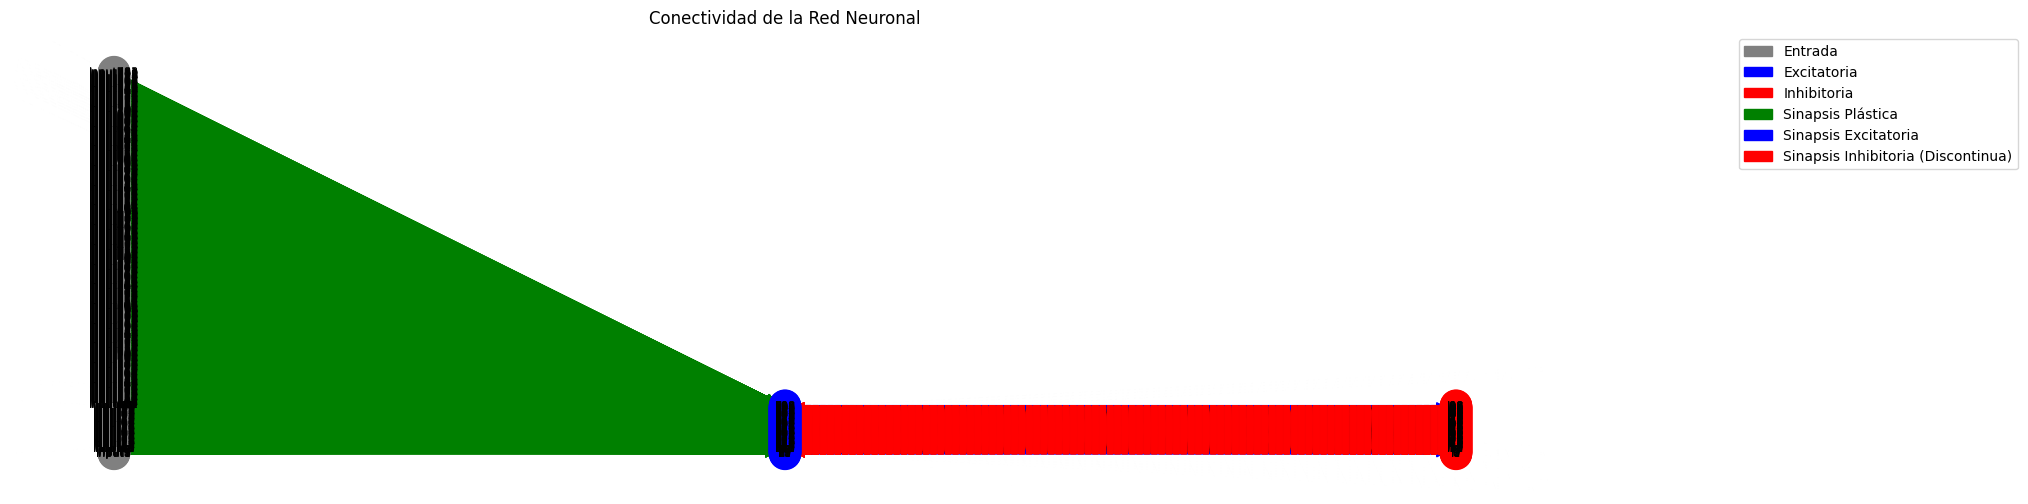

In [30]:
# Visualizar la conectividad
model.visualize_connectivity()

In [12]:
# Función para graficar la evolución de los pesos sinápticos y las trazas STDP.
def plot_w(S1M):
    # Configura el tamaño de la figura.
    plt.rcParams["figure.figsize"] = (20, 10)

    # Primer subgráfico: evolución de los pesos sinápticos normalizados.
    subplot(311)
    plot(S1M.t/ms, S1M.w.T/gmax)
    ylabel('w / wmax')
    plt.title('Evolución de los pesos sinapticos a través del tiempo')

    # Segundo subgráfico: traza pre-sináptica Apre.
    subplot(312)
    plot(S1M.t/ms, S1M.Apre.T)
    ylabel('Apre')
    plt.title('Traza presináptica (Apre) a lo largo del tiempo')

    # Tercer subgráfico: traza post-sináptica Apost.
    subplot(313)
    plot(S1M.t/ms, S1M.Apost.T)
    ylabel('Apost')
    plt.title('Traza postsináptica (Apost) a lo largo del tiempo')

    # Ajusta el diseño de los subgráficos y muestra la figura.
    tight_layout()
    show()

# Función para graficar los potenciales de membrana de neuronas excitatorias e inhibitorias.
def plot_v(ESM, ISM, neuron=13):
    # Configura el tamaño de la figura.
    plt.rcParams["figure.figsize"] = (20, 6)

    # Define un contador para graficar solo la parte final de la simulación.
    cnt = -50000  # tail

    # Grafica el potencial de membrana de la neurona excitatoria especificada.
    plot(ESM.t[cnt:]/ms, ESM.v[neuron][cnt:]/mV, label='Neurona excitatoria',
         color='r')

    # Grafica el potencial de membrana de la neurona inhibitoria especificada.
    plot(ISM.t[cnt:]/ms, ISM.v[neuron][cnt:]/mV, label='Neurona inhibitoria',
         color='b')

    # Añade líneas horizontales para los umbrales de disparo.
    plt.axhline(y=v_thresh_e/mV, color='pink', label='Umbral excitatorio')
    plt.axhline(y=v_thresh_i/mV, color='silver', label='Umbral inhibitorio')

    # Añade una leyenda y etiquetas.
    legend()
    ylabel('Potencial de membrana (mV)')
    plt.title('Potencial de membrana de una neurona a lo largo del tiempo {}'.format(neuron))

    # Muestra la figura.
    show()


# Función para graficar las tasas de disparo de neuronas excitatorias e inhibitorias.
def plot_rates(ERM, IRM):
    # Configura el tamaño de la figura.
    plt.rcParams["figure.figsize"] = (20, 6)

    # Grafica las tasas de disparo suavizadas de las neuronas excitatorias.
    plot(ERM.t/ms, ERM.smooth_rate(window='flat', width=0.1*ms)*Hz, color='r',
         label='Neuronas excitatorias')

    # Grafica las tasas de disparo suavizadas de las neuronas inhibitorias.
    plot(IRM.t/ms, IRM.smooth_rate(window='flat', width=0.1*ms)*Hz, color='b',
         label='Neuronas inhibitorias')

    # Añade una leyenda y etiquetas.
    legend()
    ylabel('Tasa de disparo (Hz)')
    plt.title('Tasas de disparo de las neuronas excitadoras e inhibidoras a lo largo del tiempo')

    # Muestra la figura.
    show()

# Función para graficar los spikes (disparos) de neuronas excitatorias e inhibitorias.
def plot_spikes(ESP, ISP):
    # Configura el tamaño de la figura.
    plt.rcParams["figure.figsize"] = (20, 6)

    # Grafica los spikes de las neuronas excitatorias.
    plot(ESP.t/ms, ESP.i, '.r', label='Neuronas excitatorias')

    # Grafica los spikes de las neuronas inhibitorias.
    plot(ISP.t/ms, ISP.i, '.b', label='Neuronas inhibitorias')

    # Añade una leyenda y etiquetas.
    legend()
    ylabel('Índice neuronal')
    plt.title('Trenes de picos de neuronas excitadoras e inhibidoras')

    # Muestra la figura.
    show()


# Función para probar y visualizar la red SNN con STDP.
def test0(train_items=30):
    '''
    Visualización de STDP
    '''
    seed(0)  # Fija la semilla aleatoria para reproducibilidad.

    # Crea una instancia del modelo en modo debug para activar los monitores.
    model = Model(debug=True)

    # Entrena el modelo con las primeras `train_items` imágenes del conjunto de entrenamiento.
    model.train(X_train[:train_items], epoch=1)

    # Llama a las funciones de visualización para graficar los resultados.
    plot_w(model['S1M'])  # Grafica la evolución de los pesos sinápticos y las trazas STDP.
    plot_v(model['ESM'], model['ISM'])  # Grafica los potenciales de membrana de neuronas excitatorias e inhibitorias.
    plot_rates(model['ERM'], model['IRM'])  # Grafica las tasas de disparo de neuronas excitatorias e inhibitorias.
    plot_spikes(model['ESP'], model['ISP'])  # Grafica los spikes de neuronas excitatorias e inhibitorias.

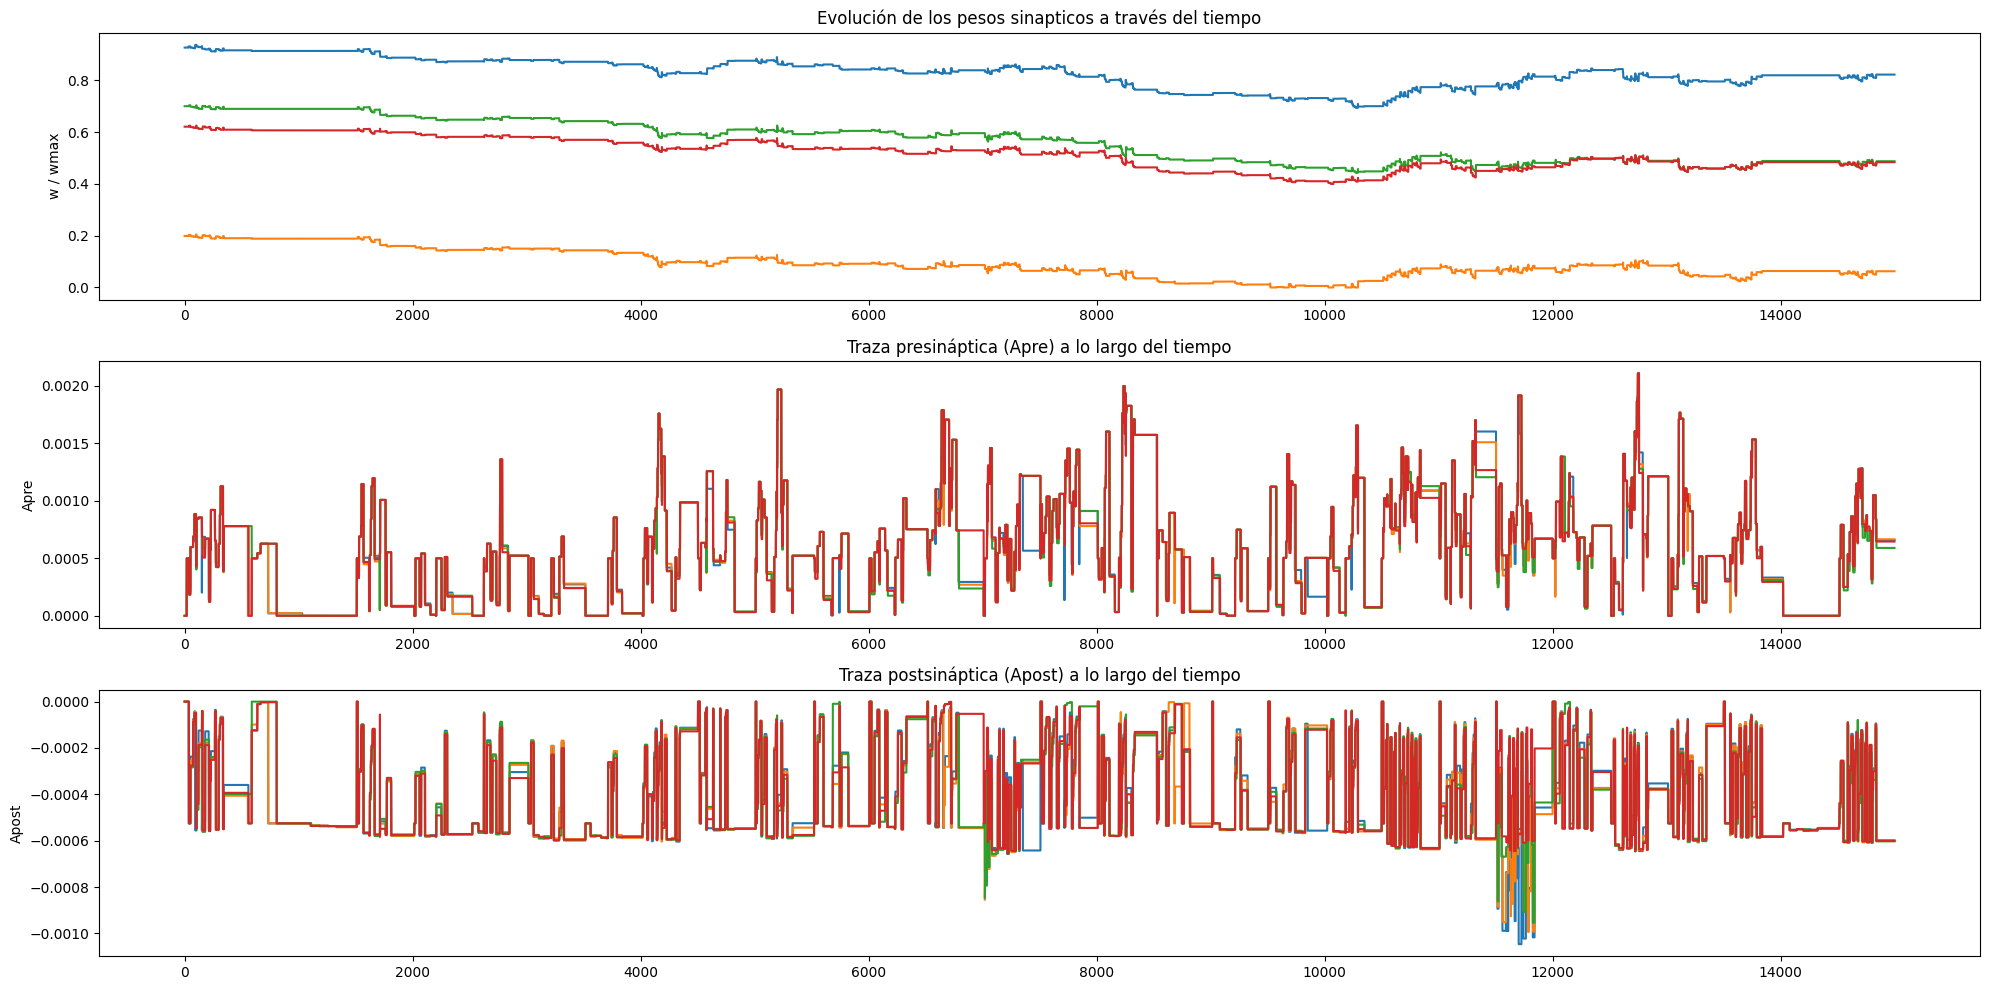

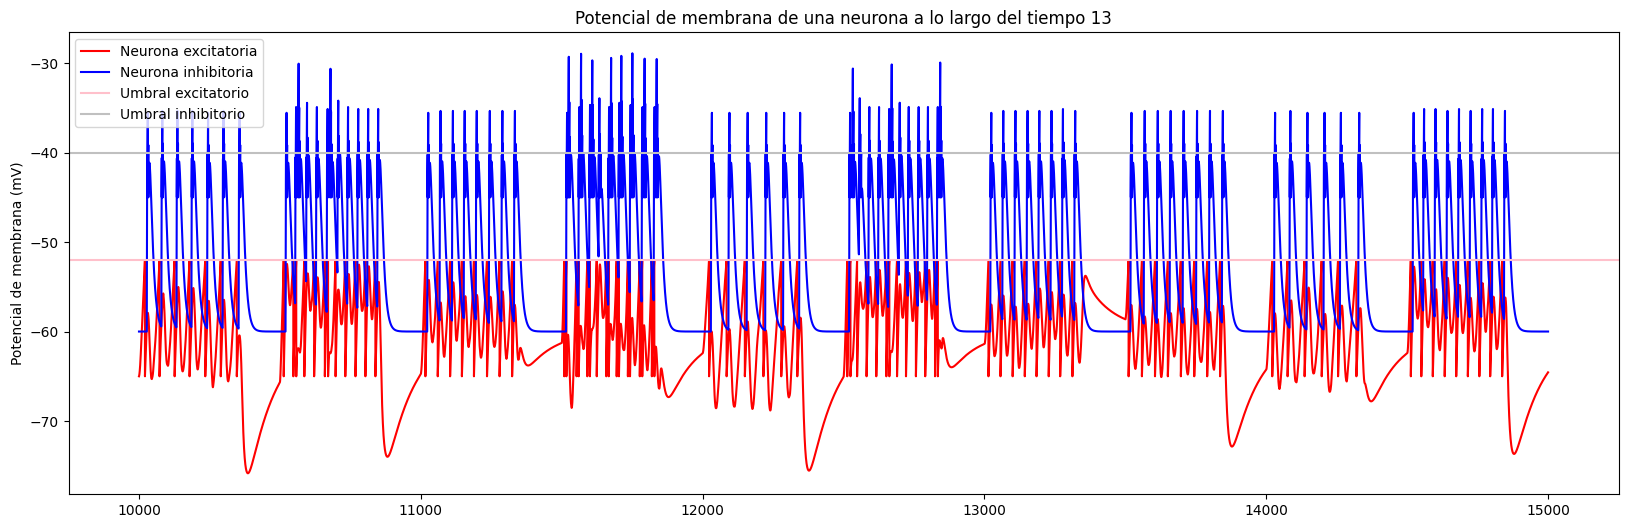

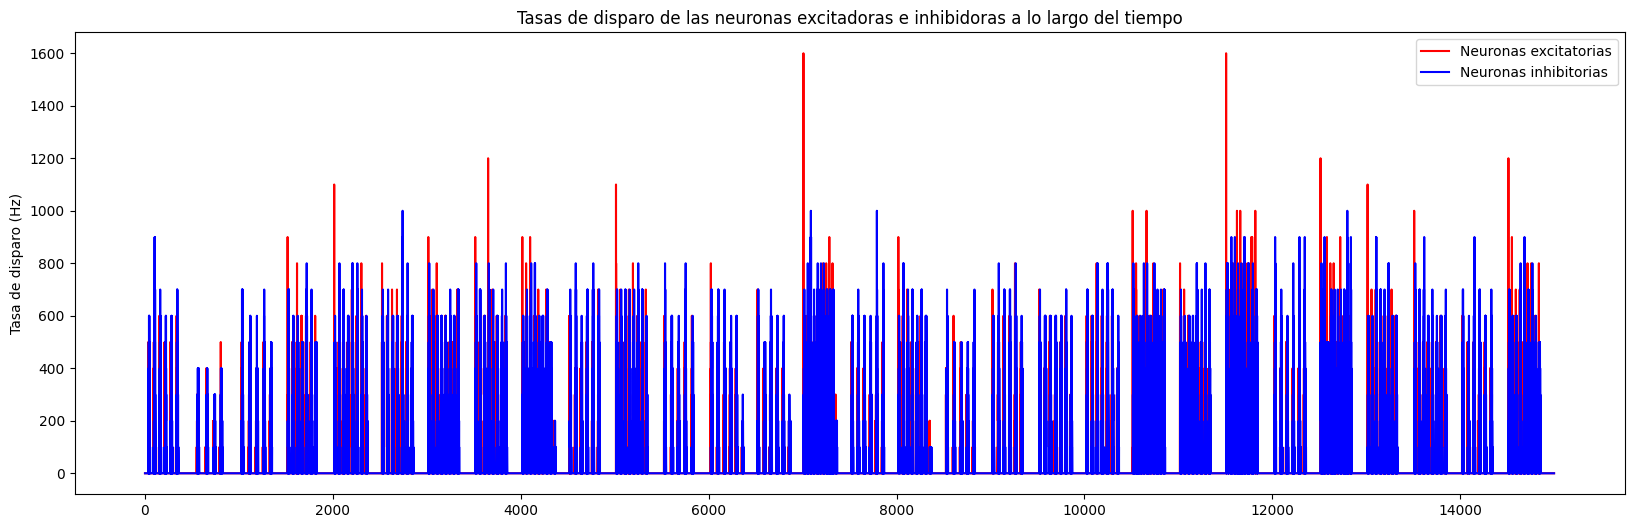

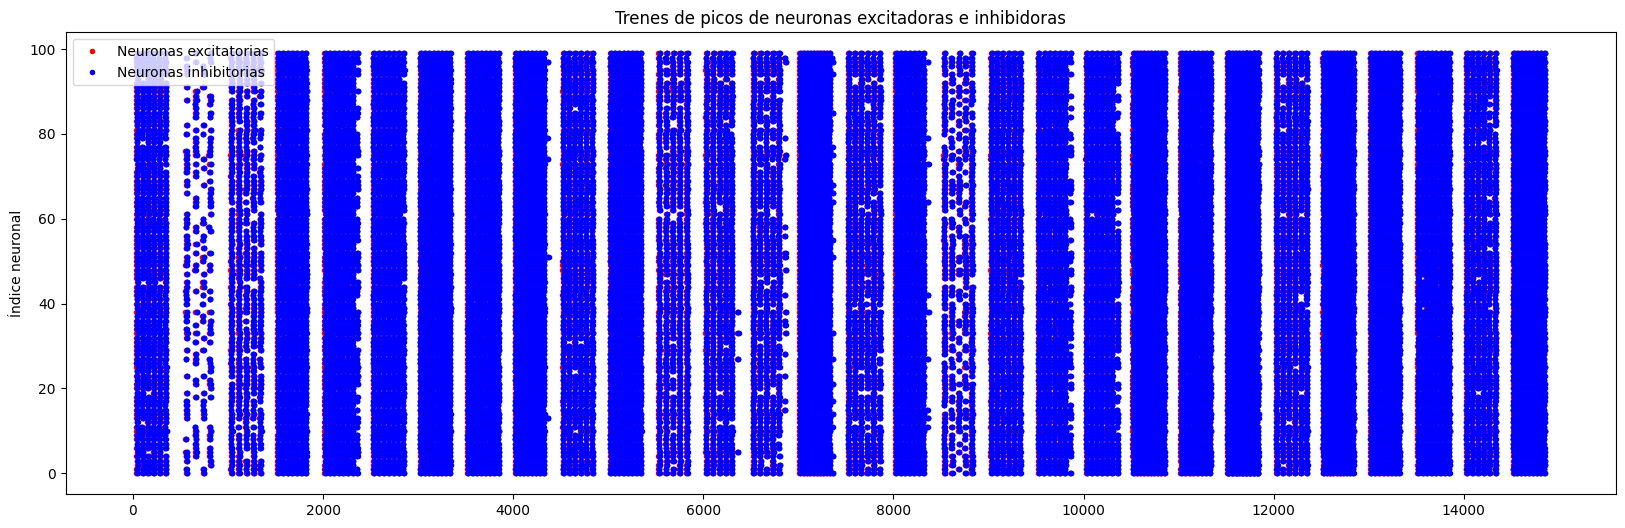

In [14]:
test0(train_items=len(X_train[:30]))

In [17]:
# Define una función para entrenar y evaluar la red SNN junto con un clasificador RandomForest.
def test1(train_items=5000, assign_items=1000, eval_items=1000):
    '''
    Alimenta el conjunto de entrenamiento a la SNN con STDP.
    Congela STDP.
    Alimenta nuevamente el conjunto de entrenamiento a la SNN y recolecta las características generadas.
    Entrena un RandomForest usando estas características y las etiquetas proporcionadas.
    Alimenta el conjunto de prueba a la SNN y recolecta nuevas características.
    Predice las etiquetas con RandomForest y calcula la precisión.
    '''
    # Fija la semilla aleatoria para reproducibilidad.
    seed(0)

    # Crea una instancia del modelo SNN.
    model = Model()

    # Entrena el modelo con las primeras `train_items` imágenes del conjunto de entrenamiento.
    model.train(X_train[:train_items], epoch=1)

    # Almacena el estado de la red después del entrenamiento.
    model.net.store('train', 'train.b2')

    # Evaluación del modelo con un subconjunto de datos de validacion para obtener características.
    # f_train = model.evaluate(X_train[:assign_items])
    f_train = model.evaluate(X_val[:assign_items])

    # Crea una instancia del clasificador RandomForest con una profundidad máxima de 4.
    clf = RandomForestClassifier(max_depth=4, random_state=0)

    # Entrena el clasificador RandomForest con las características y etiquetas del subconjunto de entrenamiento.
    # clf.fit(f_train, y_train[:assign_items])
    clf.fit(f_train, y_val[:assign_items])

    # Muestra la precisión del clasificador en el subconjunto de entrenamiento.
    # print(clf.score(f_train, y_train[:assign_items]))
    print(clf.score(f_train, y_val[:assign_items]))

    # Evaluación del modelo con un subconjunto de datos de prueba para obtener nuevas características.
    f_test = model.evaluate(X_test[:eval_items])

    # Predice las etiquetas del subconjunto de prueba usando el clasificador RandomForest.
    y_pred = clf.predict(f_test)

    # Muestra la precisión del clasificador en el subconjunto de prueba.
    print(accuracy_score(y_pred, y_test[:eval_items]))

    # Calcula y muestra la matriz de confusión para las predicciones del clasificador.
    cm = confusion_matrix(y_pred, y_test[:eval_items])
    print(cm)

**Entrenamiento de la SNN:**
- La red neuronal SNN se entrena usando las primeras 5000 imágenes del conjunto de entrenamiento.
- Se almacena el estado de la red después del entrenamiento para poder recuperarlo si es necesario.

**Evaluación y recolección de características:**
- Se evalúa la SNN con un subconjunto de 1000 imágenes del conjunto de entrenamiento para recolectar las características generadas por la red.
- Estas características se utilizan para entrenar un clasificador RandomForest.

**Entrenamiento del clasificador RandomForest:**
- Se entrena el clasificador RandomForest con las características obtenidas y las etiquetas correspondientes.
- Se muestra la precisión del clasificador en el subconjunto de entrenamiento.

**Evaluación en el conjunto de prueba:**
- Se evalúa la SNN con un subconjunto de 1000 imágenes del conjunto de prueba para recolectar nuevas características.
- Se predicen las etiquetas de estas características usando el clasificador RandomForest.
- Se muestra la precisión del clasificador en el subconjunto de prueba y se calcula la matriz de confusión para las predicciones.

In [18]:
test1()

0.499
0.438
[[ 6  0  0  1  0  0  1  0  0  0]
 [18 86 17 28  9  0 14  0  1  0]
 [ 2  0  6  0  5  0  3  0  0  1]
 [22 11  7 31  8  0 14  0  5  0]
 [48  1 60 23 73  0 46  0 15  0]
 [ 7  7  7  9  2 57 10 14  6  2]
 [ 0  0  2  0  5  0  1  0  0  0]
 [ 0  0  0  1  0 24  2 71  6 16]
 [ 4  0 12  0 13  0  5  0 35  4]
 [ 0  0  0  0  0  6  1 10 27 72]]


In [ ]:
# Define una función para evaluar la SNN con STDP congelado desde el inicio y entrenar un clasificador RandomForest.
def test2(train_items=len(X_train), assign_items=1000, eval_items=len(X_test)):
    '''
    Congela STDP al inicio.
    Alimenta el conjunto de entrenamiento a la SNN y recolecta las características generadas.
    Entrena un RandomForest usando estas características y las etiquetas proporcionadas.
    Alimenta el conjunto de prueba a la SNN y recolecta nuevas características.
    Predice las etiquetas con RandomForest y calcula la precisión.
    '''
    # Fija la semilla aleatoria para reproducibilidad.
    seed(0)

    # Crea una instancia del modelo SNN.
    model = Model()

    # Evaluación del modelo con un subconjunto de datos de entrenamiento para obtener características.
    f_train = model.evaluate(X_train[:assign_items])

    # Crea una instancia del clasificador RandomForest con una profundidad máxima de 4.
    clf = RandomForestClassifier(max_depth=4, random_state=0)

    # Entrena el clasificador RandomForest con las características y etiquetas del subconjunto de entrenamiento.
    clf.fit(f_train, y_train[:assign_items])

    # Muestra la precisión del clasificador en el subconjunto de entrenamiento.
    print(clf.score(f_train, y_train[:assign_items]))

    # Evaluación del modelo con un subconjunto de datos de prueba para obtener nuevas características.
    f_test = model.evaluate(X_test[:eval_items])

    # Predice las etiquetas del subconjunto de prueba usando el clasificador RandomForest.
    y_pred = clf.predict(f_test)

    # Muestra la precisión del clasificador en el subconjunto de prueba.
    print(accuracy_score(y_pred, y_test[:eval_items]))

    # Calcula y muestra la matriz de confusión para las predicciones del clasificador.
    cm = confusion_matrix(y_pred, y_test[:eval_items])
    print(cm)

**Congelación del STDP:**
- La red neuronal SNN se evalúa sin activar el aprendizaje STDP. Esto significa que los pesos sinápticos no se actualizarán durante el proceso de evaluación.

**Evaluación y recolección de características:**
- Se evalúa la SNN con un subconjunto de 1000 imágenes del conjunto de entrenamiento para recolectar las características generadas por la red.
Estas características se utilizan para entrenar un clasificador RandomForest.

**Entrenamiento del clasificador RandomForest:**
- Se entrena el clasificador RandomForest con las características obtenidas y las etiquetas correspondientes.
- Se muestra la precisión del clasificador en el subconjunto de entrenamiento.

**Evaluación en el conjunto de prueba:**
- Se evalúa la SNN con un subconjunto de 1000 imágenes del conjunto de prueba para recolectar nuevas características.
- Se predicen las etiquetas de estas características usando el clasificador RandomForest.
- Se muestra la precisión del clasificador en el subconjunto de prueba y se calcula la matriz de confusión para las predicciones.

In [ ]:
test2()

In [ ]:
# Define una función para entrenar y evaluar un clasificador RandomForest sin usar la SNN.
def test3(train_items=len(X_train), assign_items=1000, eval_items=len(X_test)):
    '''
    Entrena y evalúa RandomForest sin usar la SNN.
    '''
    # Fija la semilla aleatoria para reproducibilidad.
    seed(0)

    # Crea una instancia del clasificador RandomForest con una profundidad máxima de 4.
    clf = RandomForestClassifier(max_depth=4, random_state=0)

    # Prepara las características de entrenamiento a partir de las imágenes aplanadas (convertidas en vectores).
    train_features = X_train[:train_items].reshape(-1, 28*28)

    # Entrena el clasificador RandomForest con las características y etiquetas del conjunto de entrenamiento.
    clf.fit(train_features, y_train[:train_items])

    # Muestra la precisión del clasificador en el conjunto de entrenamiento.
    print(clf.score(train_features, y_train[:train_items]))

    # Prepara las características de prueba a partir de las imágenes aplanadas (convertidas en vectores).
    test_features = X_test[:eval_items].reshape(-1, 28*28)

    # Predice las etiquetas del conjunto de prueba usando el clasificador RandomForest.
    y_pred = clf.predict(test_features)

    # Muestra la precisión del clasificador en el conjunto de prueba.
    print(accuracy_score(y_pred, y_test[:eval_items]))

    # Calcula y muestra la matriz de confusión para las predicciones del clasificador.
    cm = confusion_matrix(y_pred, y_test[:eval_items])
    print(cm)


**Preparación del clasificador RandomForest:**
- Se crea una instancia del clasificador RandomForest con una profundidad máxima de 4 para controlar la complejidad del modelo.

**Entrenamiento del clasificador:**
- Se preparan las características de entrenamiento a partir de las imágenes del conjunto de entrenamiento, aplanándolas en vectores de 28x28 píxeles.
- El clasificador RandomForest se entrena con estas características y las etiquetas correspondientes.

**Evaluación del clasificador en el conjunto de entrenamiento:**
- Se muestra la precisión del clasificador en el conjunto de entrenamiento para evaluar su desempeño.

**Evaluación en el conjunto de prueba:**
- Se preparan las características de prueba a partir de las imágenes del conjunto de prueba, aplanándolas en vectores de 28x28 píxeles.
- Se predicen las etiquetas del conjunto de prueba usando el clasificador RandomForest.
- Se muestra la precisión del clasificador en el conjunto de prueba.
- Se calcula y muestra la matriz de confusión para las predicciones del clasificador, lo que proporciona una visión detallada del desempeño del modelo en cada clase.

In [ ]:
test3()